## Vilnius real estate Market analysis

* Purpose: analyse Vilnius real estate pricing changes during Covid-19 and post-Covid period (est. 2020.05-2020.08)
* Hypothesis: the fluctuations in real estate rent prices should affect the real estate prices.
* Scope: data from one of the Lithuanian real estate market portals used.
* Data loaded every 2-3 days to monitor market changes.
* Weekly averages calculated and compared to avoid big outlayers.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load the raw data
df = pd.read_excel(r'C:\Users\tiesi\Class D\Aruodas Analytical work part 1\Data.xlsx', index_col=0) 

#update column types:
df['log_date'] = pd.to_datetime(df['log_date'])
#print(df.shape)
print(df.head(5))

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\tiesi\\Class D\\Aruodas Analytical work part 1\\Data.xlsx'

Working the outlayers
* Quantiles will be calculated individually for each day when the data was collected.
* Bottom 5 and top 5 % of the data will be removed from each day to improve quality of results.

In [3]:
#getting all the dates
log_dates = set(df['log_date'])
#print(sorted(log_dates))

#creating a new table where data without outlyers will be put
df2 = pd.DataFrame(data=None, columns=df.columns, index=df.index)

#preparing the quantiles range dataframe
column_names = ['Q1','Q2','Q3','Q4','IQR', 
                'Skewness_w_outlyers','Skewness', 
                'Mean_w_outlyers', 'Mean',
                'Median_w_outlyers', 'Median',
                'nr_objects_w_outlyers', 'nr_objects']
quantiles_range = pd.DataFrame(columns = column_names)

for date in sorted(log_dates):
    Q1 = df['price_sq_m'][df['log_date'] == date].quantile(.05) 
    Q2 = df['price_sq_m'][df['log_date'] == date].quantile(.25) 
    Q3 = df['price_sq_m'][df['log_date'] == date].quantile(.75) 
    Q4 = df['price_sq_m'][df['log_date'] == date].quantile(.95)
    Skewness1 = df['price_sq_m'][df['log_date'] == date].skew()
    Mean1 = df['price_sq_m'][df['log_date'] == date].mean()
    Median1 = df['price_sq_m'][df['log_date'] == date].median()
    IQR = Q3 - Q2
    #adding data without outlyers to new table
    df2 = df[df['price_sq_m'] > Q1]
    df2 = df2[df2['price_sq_m'] < Q4]
    Skewness2 = df2['price_sq_m'][df2['log_date'] == date].skew()
    Mean2 = df2['price_sq_m'][df2['log_date'] == date].mean()
    Median2 = df2['price_sq_m'][df2['log_date'] == date].median()
    nr_objects_w_outlyers = df['price_sq_m'][df['log_date'] == date].count()
    nr_objects = df2['price_sq_m'][df2['log_date'] == date].count()
    quantiles_range = quantiles_range.append(pd.Series(data={'Q1': Q1,
                                                             'Q2': Q2,
                                                             'Q3' : Q3,
                                                             'Q4': Q4,
                                                             'IQR': IQR,
                                                             'Skewness_w_outlyers': Skewness1,
                                                             'Skewness': Skewness2,
                                                             'Mean_w_outlyers': Mean1,
                                                             'Mean': Mean2,
                                                             'Median_w_outlyers':Median1,
                                                             'Median':Median2,
                                                             'nr_objects_w_outlyers': nr_objects_w_outlyers,
                                                             'nr_objects': nr_objects
                                                            }, name=(date)))


In [4]:
quantiles_range['log_date'] = quantiles_range.index
quantiles_range.tail()

,Q1,Q2,Q3,Q4,IQR,Skewness_w_outlyers,Skewness,Mean_w_outlyers,Mean,Median_w_outlyers,Median,nr_objects_w_outlyers,nr_objects,log_date
2020-05-26,955.00,1429.25,2453.75,3599.4,1024.50,1.282432,0.600588,2005.630608,1948.467635,1823.5,1824.0,3522.0,3167.0,2020-05-26
2020-05-30,953.95,1438.75,2478.00,3588.6,1039.25,1.268314,0.588233,2010.648023,1953.719083,1825.0,1825.0,3540.0,3186.0,2020-05-30
2020-06-03,956.00,1434.50,2467.00,3589.2,1032.50,1.292766,0.600142,2005.598212,1948.286957,1825.0,1825.0,3579.0,3220.0,2020-06-03
2020-06-10,990.00,1442.50,2467.00,3602.0,1024.50,1.293688,0.631237,2014.610617,1957.723786,1825.5,1826.0,3598.0,3233.0,2020-06-10
2020-06-17,989.65,1441.25,2451.50,3602.0,1010.25,1.274639,0.626538,2011.984331,1953.822395,1827.0,1827.0,3574.0,3215.0,2020-06-17


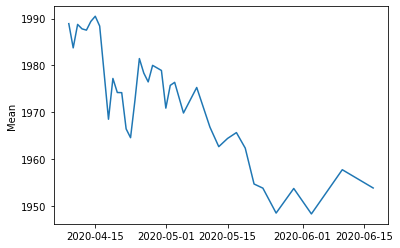

In [7]:
plt.plot(quantiles_range['Mean'])
plt.ylabel('Mean')
plt.show()

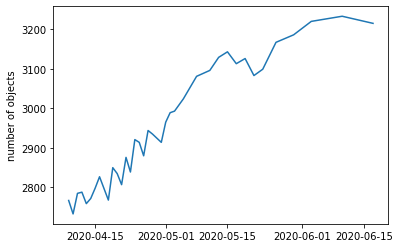

In [6]:
plt.plot(quantiles_range['nr_objects'])
plt.ylabel('number of objects')
plt.show()

In [ ]:
# plt.plot( 'log_date', 'Q1', data=quantiles_range, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
# plt.plot( 'log_date', 'Q2', data=quantiles_range, marker='', color='olive', linewidth=2)
# plt.plot( 'log_date', 'Q3', data=quantiles_range, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")
# plt.legend()

In [ ]:
#IQR Score
#The rule of thumb is that anything not in the range of (Q1 - 1.5 IQR) and (Q3 + 1.5 IQR) is an outlier, and can be removed.
# df3 = df['price_sq_m']

# df_out = df3[~((df3 < (Q1 - 1.5 * IQR)) |(data1 > (Q3 + 1.5 * IQR))).any(axis=1)]
# print(df_out.shape)

* with outlyers (min & max 5%)

* without outlyers (min & max 5%)

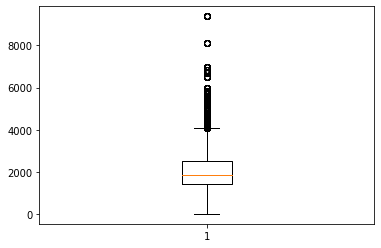

In [8]:
plt.boxplot(df['price_sq_m'])
plt.show()

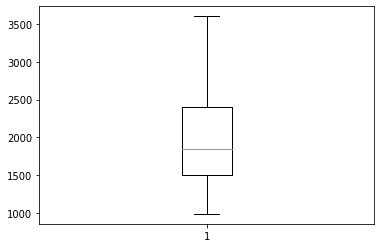

In [10]:
plt.boxplot(df2['price_sq_m'])
plt.show()

## Creation of data buckets for further analysis

In [11]:
# apartment size buckets:
def define_size_bucket(df2):
  if df2['space_sq_m'] < 30.0:
    return 1
  elif df2['space_sq_m'] > 30.0 and df2['space_sq_m']< 55.0:
    return 2
  elif df2['space_sq_m'] > 55.0 and df2['space_sq_m']< 70.0:
    return 3
  elif df2['space_sq_m'] > 70.0 and df2['space_sq_m']< 90.0:
    return 4
  else:
    return 5


In [12]:
df2['size_bucket'] = df2.apply(define_size_bucket, axis=1)
#df2['district_bucket'] = df2.apply(define_district_bucket, axis=1)

In [13]:
#street ranking calculation
streets = df2.groupby('street').aggregate(np.mean)
streets = streets.sort_values(by=['price_sq_m'], ascending=False)
streets = streets.reset_index()
streets['street_rank'] = streets.index
streets = streets[['street','street_rank']]

In [14]:
#district ranking calculation
districts = df2.groupby('district').aggregate(np.mean)
districts = districts.sort_values(by=['price_sq_m'], ascending=False)
districts = districts.reset_index()
districts['district_rank'] = districts.index
districts = districts[['district','district_rank']]

In [14]:
df2 = pd.merge(df2, districts, on='district', how='outer')
df2 = pd.merge(df2, streets, on='street', how='outer')


## Correlation initial Analysis

In [15]:
df2.columns
potentialFeatures = [ 'is_new_project', 'reserved',
       'price_change', 'is_auction', 'nr_stars', 'year', 'total_price',
       'price_sq_m', 'rounded_price_sq_m', 'nr_rooms', 'space_sq_m',
       'rounded_space_sq_m', 'floor', 'nr_floors', 'state', 'type',
       'size_bucket', 'district_rank', 'street_rank']
# check how the features are correlated with the price  sq m
for f in potentialFeatures:
    related = df2['price_sq_m'].corr(df2[f])
    print("%s: %f" % (f,related))

is_new_project: -0.007634
reserved: -0.008234
price_change: -0.010973
is_auction: -0.008857
nr_stars: -0.020907
year: 0.086500
total_price: 0.542693
price_sq_m: 1.000000
rounded_price_sq_m: 0.998930
nr_rooms: 0.018102
space_sq_m: 0.073222
rounded_space_sq_m: 0.073204
floor: 0.013096
nr_floors: 0.002026
state: -0.052899
type: nan
size_bucket: 0.076606


KeyError: 'district_rank'

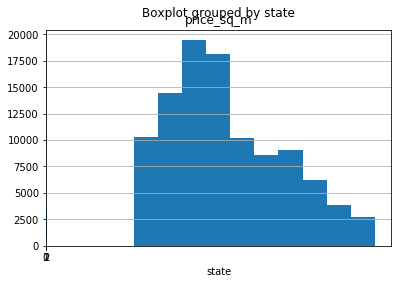

In [16]:
df2.boxplot(column='price_sq_m', by='state')
df2.price_sq_m.hist()

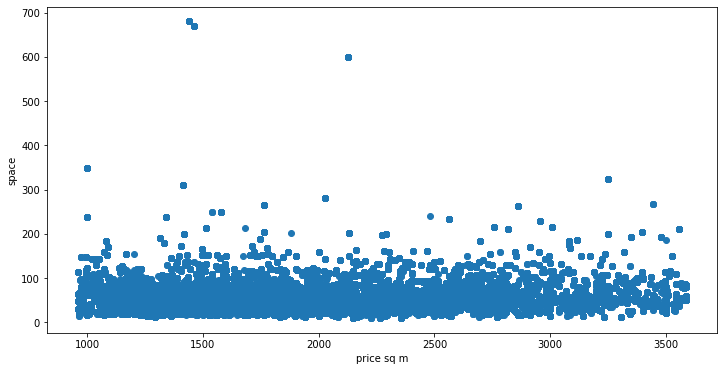

In [17]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(df2['price_sq_m'], df2['space_sq_m'])
ax.set_xlabel('price sq m')
ax.set_ylabel('space')
plt.show()

Code below is either not used or to be used later:

In [ ]:
#Skewness
# -1 / + 1 is considered regular
print(df['price_sq_m'].skew())
df['price_sq_m'].describe()

In [ ]:
#Outlier treatment
#Quantile-based Flooring and Capping
Q1 = df['price_sq_m'].quantile(0.05)
Q3 = df['price_sq_m'].quantile(0.95)
print(Q1)
print(Q3)


data_1 = df[df['price_sq_m'] > Q1]
data_1 = df[df['price_sq_m'] < Q3]
print(data_1.shape)
#skewness differences
print(df['price_sq_m'].skew())
print(data_1['price_sq_m'].skew())


In [ ]:
#trimming
index = data[(data1['price_sq_m'] >= 3156.0)|(data['price_sq_m'] <= 1113.19)].index
data.drop(index, inplace=True)
data['price_sq_m'].describe()

In [ ]:
#IQR Score
#The rule of thumb is that anything not in the range of (Q1 - 1.5 IQR) and (Q3 + 1.5 IQR) is an outlier, and can be removed.
df3 = df['price_sq_m']

df_out = df3[~((df3 < (Q1 - 1.5 * IQR)) |(data1 > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

In [183]:
#date calculations
period = data_1.groupby('log_date').aggregate(np.mean)
period.head(5)

,is_new_project,reserved,price_change,is_auction,nr_stars,year,total_price,price_sq_m,rounded_price_sq_m,nr_rooms,space_sq_m,rounded_space_sq_m,floor,nr_floors,state,type,size_bucket
log_date,,,,,,,,,,,,,,,,,
2020-04-09,0.068239,0.016792,0.039741,0.023580,0.440157,1996.252233,122150.586995,1911.601286,1913.504823,2.467310,62.572008,62.574848,3.389425,6.643087,1.635584,1.0,2.964987
2020-04-10,0.069414,0.016269,0.040334,0.024223,0.438539,1996.203181,121593.971800,1909.622560,1911.641359,2.461678,62.394624,62.398771,3.392986,6.654736,1.626537,1.0,2.954447
2020-04-11,0.065789,0.016003,0.039469,0.021693,0.390825,1996.438122,122126.564367,1913.283428,1915.291607,2.466572,62.544733,62.548720,3.403627,6.656117,1.636913,1.0,2.964794
2020-04-12,0.067116,0.015980,0.039712,0.021662,0.348722,1996.610440,122044.691761,1913.732244,1915.838068,2.463778,62.482724,62.486506,3.400568,6.658026,1.634233,1.0,2.960582
2020-04-13,1.000000,1.000000,0.040013,1.000000,0.322557,1996.307112,121843.280532,1912.396911,1914.547414,2.459770,62.463696,62.465876,3.418822,6.672055,1.642960,1.0,2.958693


In [ ]:

# # district buckets:
# first_tier =['Senamiestis','Žvėrynas','Užupis', 'Filaretai']
# second_tier = ['Valakampiai','Naujamiestis', 'Šnipiškės','Turniškės']
# third_tier = ['Antakalnis', 'Šiaurės miestelis','Žirmūnai', 'Burbiškės', 'Visoriai',
#             'Avižienių k.', 'Tarandės k.', 'Verkiai','Markučiai','Santariškės', 'Saulėtekis']
# fourth_tier = ['Klevinės vs.','Baltupiai','Bajorai','Lazdynėliai','Pilaitė',
# 'Šeškinė','Viršuliškės','Jeruzalė','Vilkpėdė','Liepkalnis','Karoliniškės','Pašilaičiai','Rasos',
# 'Lazdynai','Dvarčionys','Avižieniai','Justiniškės','Bendorių k.','Kalnėnai','Fabijoniškės',
# 'Bukiškio k.','Tarandė','Skaidiškės','Bukčiai','Balsiai','Naujininkai']

# def define_district_bucket(df2):
#   if df2['district'] in first_tier:
#     return 1
#   elif df2['district'] in second_tier:
#     return 2
#   elif df2['district'] in third_tier:
#     return 3
#   elif df2['district'] in fourth_tier:
#     return 4
#   else:
#     return 5

# df2['size_bucket'] =  
# 		,CASE	WHEN a.space_sq_m < 30  THEN 1
# 				WHEN a.space_sq_m >= 30 and a.space_sq_m < 50 THEN 2
# 				WHEN a.space_sq_m >= 50 and a.space_sq_m < 70 THEN 3
# 				WHEN a.space_sq_m >= 70 and a.space_sq_m < 90 THEN 4
# 				ELSE 5
# 				END AS [size_bucket]
                
#    if col[:2]=='01':
#         df.rename(columns={col:'Gold' + col[4:]}, inplace=True)
#     if col[:2]=='02':
#         df.rename(columns={col:'Silver' + col[4:]}, inplace=True)
#     if col[:2]=='03':
#         df.rename(columns={col:'Bronze' + col[4:]}, inplace=True)
#     if col[:1]=='№':
#         df.rename(columns={col:'#' + col[1:]}, inplace=True) 
                